# Hierarchical Clustering

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv("Data/Mall_Customers.csv")
display(dataset.head(), len(dataset))

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


200

In [5]:
X = dataset.iloc[:, [3,4]].values

## Plot the Data tp see what it looks like for intuition

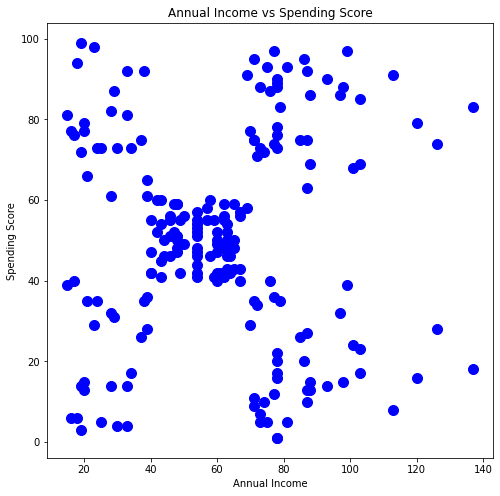

In [6]:
fig = plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'blue')

plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.show()

## Using the dendrogram to find the optimal number of clusters

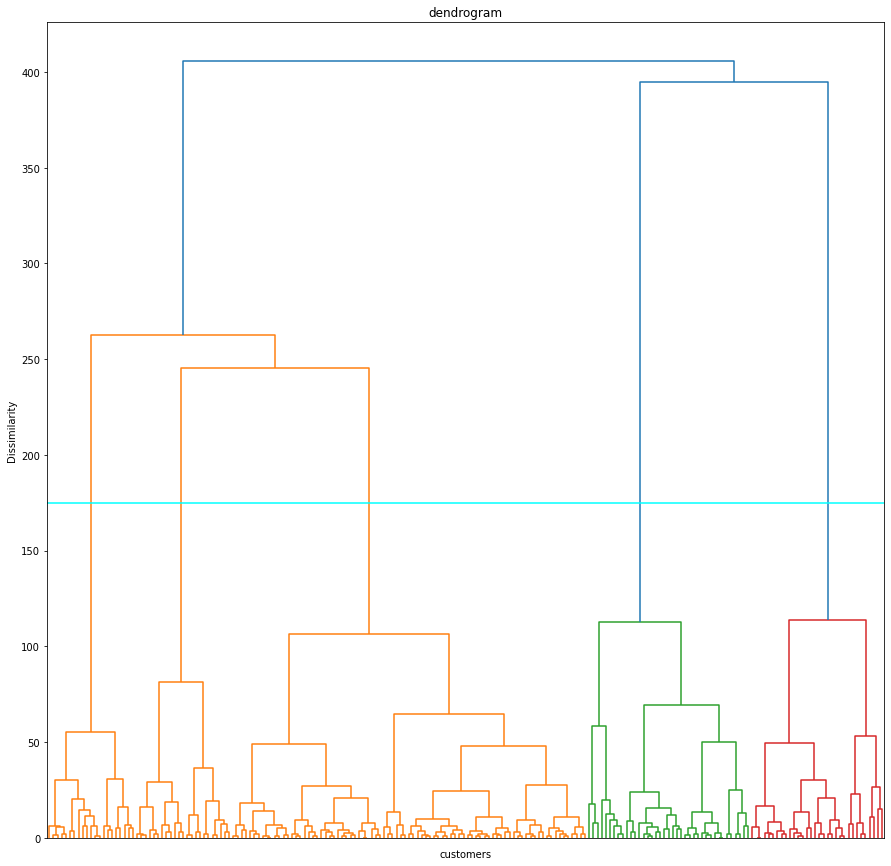

In [17]:
import scipy.cluster.hierarchy as sch
fig = plt.figure(figsize=(15, 15))

## choose method ward, as it is minimum variance method for dendrogram creation
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))

## plot a line wheere the best split is show
## found by finding the biggest vertical bar that doesnt have a horrixontal bar on any of its y levels
## the longest vertical bar is the thrid one it crossed
plt.hlines(175, 0, 20000, color = "cyan")

plt.title("dendrogram")
plt.xlabel("customers")
plt.ylabel("Dissimilarity")
plt.xticks(np.arange(1, 200, step=5))

plt.show()

## Training the Hierarchical Clustering model on the dataset

In [20]:
from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters = 5).fit(X)
y_clusters = HC.labels_

In [21]:
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

## Visualising the clusters

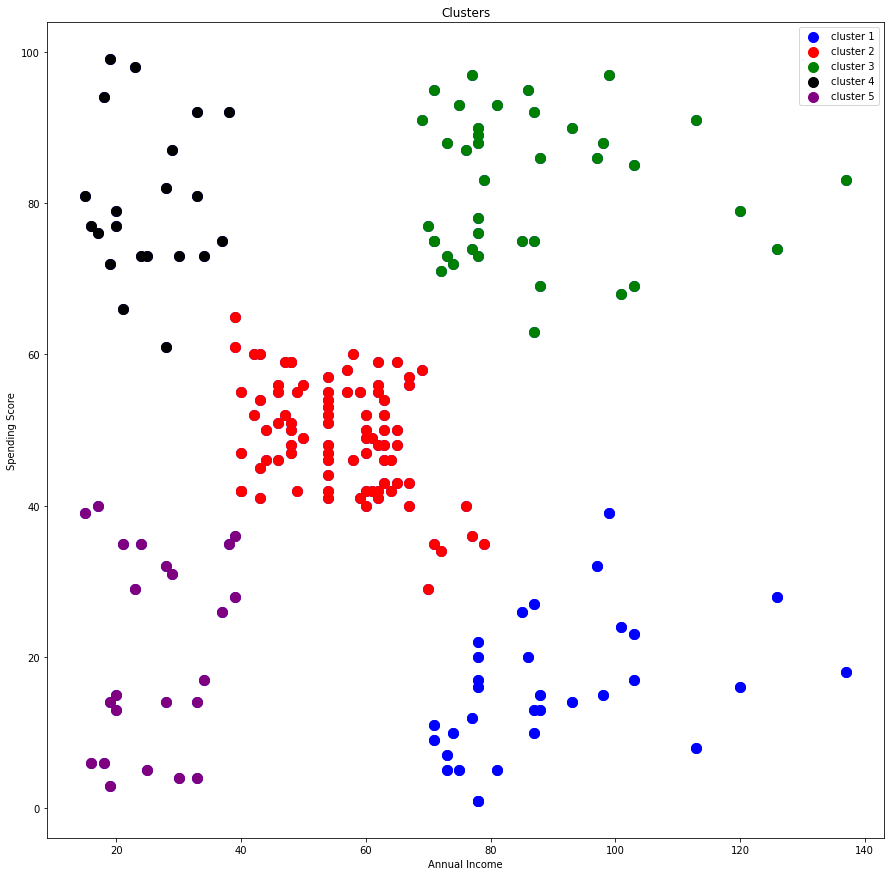

In [23]:
fig = plt.figure(figsize=(15, 15))

plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'blue')

plt.scatter(X[y_clusters==0, 0], X[y_clusters==0, 1], s = 100, c = 'blue', label = "cluster 1")
plt.scatter(X[y_clusters==1, 0], X[y_clusters==1, 1], s = 100, c = 'red', label = "cluster 2")
plt.scatter(X[y_clusters==2, 0], X[y_clusters==2, 1], s = 100, c = 'green', label = "cluster 3")
plt.scatter(X[y_clusters==3, 0], X[y_clusters==3, 1], s = 100, c = 'black', label = "cluster 4")
plt.scatter(X[y_clusters==4, 0], X[y_clusters==4, 1], s = 100, c = 'purple', label = "cluster 5")

plt.title("Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

plt.show()

## Lets check it again but with three clusters as they are close in the dendrogram

In [24]:
from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters = 3).fit(X)
y_clusters = HC.labels_

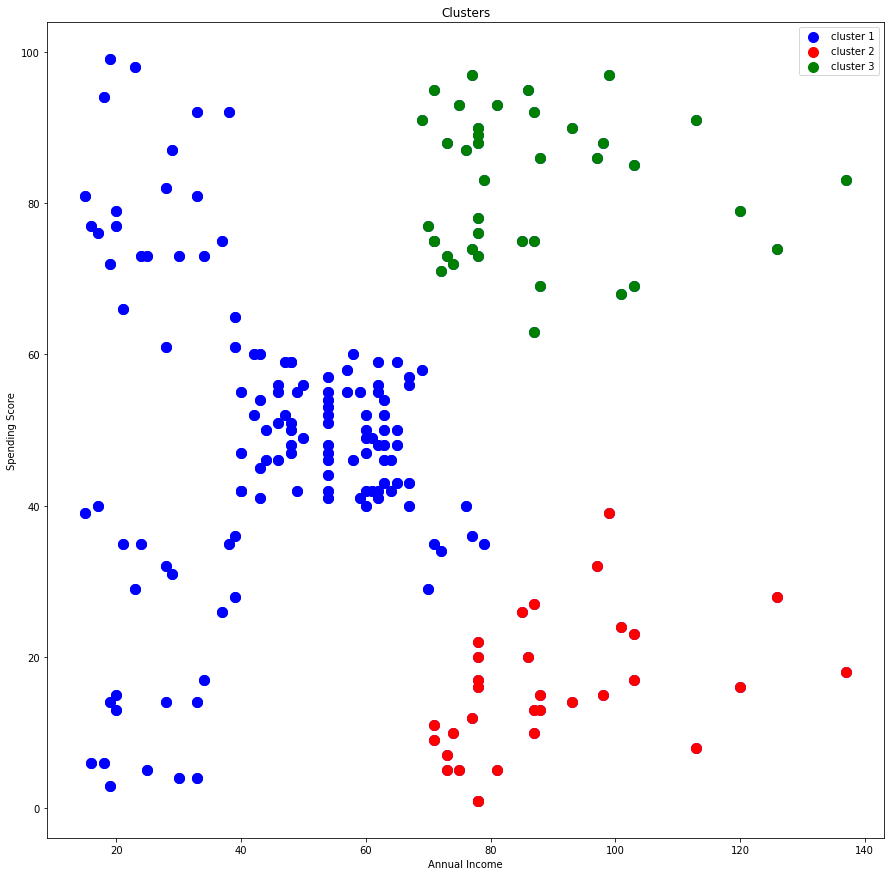

In [26]:
fig = plt.figure(figsize=(15, 15))

plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'blue')

plt.scatter(X[y_clusters==0, 0], X[y_clusters==0, 1], s = 100, c = 'blue', label = "cluster 1")
plt.scatter(X[y_clusters==1, 0], X[y_clusters==1, 1], s = 100, c = 'red', label = "cluster 2")
plt.scatter(X[y_clusters==2, 0], X[y_clusters==2, 1], s = 100, c = 'green', label = "cluster 3")

plt.title("Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

plt.show()

Definitly looks like 3 clusters is not quite right. Shows the great use of why we should be looking at the outpust as best we can. 

also shows how k means may be just better frnkly. Due to the ease of getting optimal clusters